<h1 style="color: #2E8B57;">Renewable Energy Trends in the World’s Largest Economies</h1>

<h2 style="color: #2E8B57;">Importing Libraries</h2>

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as st

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

<h2 style="color: #2E8B57;">Data extraction</h2>

In [3]:
renewable_energy = pd.read_csv('complete_renewable_energy_dataset.csv')

<h2 style="color: #2E8B57;">Exploring the dataset</h2>

In [4]:
renewable_energy.sample(10)

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
2055,USA,2018,Biomass,60454.006640,36383.992104,9.875497e+09,465993811,3.846763e+12,543061.673463,85614.458913,...,41.757949,37.649196,66.466335,943,15,2747,278527,35.780361,1,1
574,Brazil,2012,Wind,4582.415783,5085.715403,2.919873e+08,856798325,3.843312e+13,979897.029826,70315.151221,...,66.847656,8.126284,53.441418,750,33,1959,944365,92.947107,1,0
2305,China,2017,Biomass,89468.864761,16756.014030,7.872168e+09,200696785,1.059682e+14,143545.235583,45303.891799,...,62.335889,41.463261,66.622734,708,4,9136,813379,3.891352,0,1
1016,Canada,2021,Biomass,15156.078335,30711.681161,8.408380e+09,480249315,3.333450e+13,235945.547079,69990.075988,...,3.759492,64.791985,93.386301,851,36,9564,259171,40.348096,0,0
2417,USA,2019,Hydro,89344.349598,4127.861514,3.944205e+09,635171162,4.046804e+13,875964.558113,24644.874401,...,39.864110,81.404330,32.736003,640,9,8105,699794,59.030154,1,0
1632,France,2010,Hydro,66092.507091,28044.188667,8.622074e+09,185869925,8.068955e+13,477000.604472,22482.176964,...,17.482472,28.286346,94.757658,448,84,6381,299138,53.090576,0,0
884,China,2000,Solar,24105.084754,34069.365728,5.645018e+09,816003131,1.778621e+14,430375.411644,87836.486675,...,8.531157,70.288562,58.668496,967,42,5378,356349,44.267411,1,1
939,China,2014,Geothermal,30593.339152,6622.493755,2.026891e+08,1222270490,1.337809e+14,641404.988607,57210.342396,...,35.552784,46.690688,9.850829,571,81,3643,389732,40.305439,0,0
1331,Russia,2014,Hydro,88361.264336,24165.910231,1.497176e+09,1002569190,1.455825e+14,935938.513051,93012.026800,...,12.047380,48.007049,7.635795,338,35,425,435568,18.087662,0,1
1165,India,2007,Geothermal,74827.623038,25251.753454,1.984713e+09,213892879,1.672615e+14,604044.128279,4558.431631,...,6.147194,14.537481,50.375696,580,15,6738,557390,38.644064,1,0


In [5]:
renewable_energy.shape

(2500, 56)

In [6]:
renewable_energy.columns

Index(['Country', 'Year', 'Energy Type', 'Production (GWh)',
       'Installed Capacity (MW)', 'Investments (USD)', 'Population', 'GDP',
       'Energy Consumption', 'Energy Exports', 'Energy Imports',
       'CO2 Emissions', 'Renewable Energy Jobs', 'Government Policies',
       'R&D Expenditure', 'Renewable Energy Targets',
       'Average Annual Temperature', 'Annual Rainfall', 'Solar Irradiance',
       'Wind Speed', 'Hydro Potential', 'Geothermal Potential',
       'Biomass Availability', 'Energy Storage Capacity',
       'Grid Integration Capability', 'Electricity Prices', 'Energy Subsidies',
       'International Aid for Renewables', 'Public Awareness',
       'Energy Efficiency Programs', 'Urbanization Rate',
       'Industrialization Rate', 'Energy Market Liberalization',
       'Renewable Energy Patents', 'Educational Level',
       'Technology Transfer Agreements', 'Renewable Energy Education Programs',
       'Local Manufacturing Capacity', 'Import Tariffs on Energy Equipme

In [7]:
# snake_case
renewable_energy.columns = renewable_energy.columns.str.lower().str.replace(" ", "_")

##### Dataset key features (retrieved from Kaggle's webpage):

- Renewable Energy Data: Covers various types of renewable energy sources such as `solar`, `wind`, `hydro`, and `geothermal energy`, detailing their `production (in GWh)`, `installed capacity (in MW)`, and `investments (in USD)` across different `countries` and `years`.

- Socio-Economic Indicators: Includes data on `population`, `GDP`, `energy consumption`, `energy exports` and `imports`, `CO2 emissions`, `renewable energy jobs`, `government policies`, `R&D expenditure`, and `renewable energy targets`.

- Environmental Factors: Provides information on `average annual temperature`, `annual rainfall`, `solar irradiance`, `wind speed`, `hydro potential`, `geothermal potential`, and `biomass availability`.

- Additional Features: `energy storage capacity`, `grid integration capability`, `electricity prices`, `energy subsidies`, `international aid for renewables`, `public awareness scores`, `energy efficiency programs`, `urbanization rate`, `industrialization rate`, `energy market liberalization`, `renewable energy patents`, `educational level`, `technology transfer agreements`, `renewable energy education programs`, `local manufacturing capacity`, `import tariffs`, `export incentives`, `natural disasters`, `political stability`, `corruption perception index`, `regulatory quality`, `rule of law`, `control of corruption`, `economic freedom index`, `ease of doing business`, `innovation index`, `number of research institutions`, `renewable energy conferences`, `renewable energy publications`, `energy sector workforce`, `proportion of energy from renewable`, `public-private partnerships`, and `regional renewable energy cooperation`.

In [8]:
renewable_energy["country"].value_counts()

country
France       296
China        262
Japan        249
India        249
Australia    245
Russia       245
Brazil       244
Germany      241
USA          235
Canada       234
Name: count, dtype: int64

In [9]:
years_list = renewable_energy["year"].unique()
years_list.sort()
years_list

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

**Data Selection:**
- Given the large number of variables in the chosen dataset (56) I will keep only a fraction so that I can narrow the scope of the analysis. For the time being, and keeping in mind the previous description of the dataset variables, I will keep all the variables from **Renewable Energy Data** and **Environmental Factors**, and will drop `energy exports` and `imports`, `government policies`,`R&D expenditure` and `renewable energy targets` from **Socio-Economic Indicators**. Regarding Additional features I will keep `electricity prices`, `urbanization rate`, `industrialization rate`, `proportion of energy from renewable`.

In [10]:
df_renewable_energy = renewable_energy.copy()

<h2 style="color: #2E8B57;">Data Cleaning</h2>

<h3 style="color: #2E8B57;">Dropping columns</h3>

In [11]:
df_renewable_energy.drop(columns=['energy_exports', 'energy_imports', 'government_policies',
       'r&d_expenditure', 'renewable_energy_targets',
       'grid_integration_capability', 'energy_subsidies',
       'international_aid_for_renewables', 'public_awareness',
       'energy_efficiency_programs', 'energy_market_liberalization',
       'renewable_energy_patents', 'educational_level',
       'technology_transfer_agreements', 'renewable_energy_education_programs',
       'local_manufacturing_capacity', 'import_tariffs_on_energy_equipment',
       'export_incentives_for_energy_equipment', 'natural_disasters',
       'political_stability', 'corruption_perception_index',
       'regulatory_quality', 'rule_of_law', 'control_of_corruption',
       'economic_freedom_index', 'ease_of_doing_business', 'innovation_index',
       'number_of_research_institutions',
       'number_of_renewable_energy_conferences',
       'number_of_renewable_energy_publications', 'energy_sector_workforce',
       'public-private_partnerships_in_energy',
       'regional_renewable_energy_cooperation'], inplace = True)

In [12]:
df_renewable_energy.shape

(2500, 23)

<h3 style="color: #2E8B57;">Saving my df_renewable_energy dataframe</h3>

In [13]:
df_renewable_energy.to_csv('renewable_energy.csv', index=False)

<h3 style="color: #2E8B57;">Checking Null values</h3>

In [14]:
df_renewable_energy.isna().sum()

country                                 0
year                                    0
energy_type                             0
production_(gwh)                        0
installed_capacity_(mw)                 0
investments_(usd)                       0
population                              0
gdp                                     0
energy_consumption                      0
co2_emissions                           0
renewable_energy_jobs                   0
average_annual_temperature              0
annual_rainfall                         0
solar_irradiance                        0
wind_speed                              0
hydro_potential                         0
geothermal_potential                    0
biomass_availability                    0
energy_storage_capacity                 0
electricity_prices                      0
urbanization_rate                       0
industrialization_rate                  0
proportion_of_energy_from_renewables    0
dtype: int64

<h3 style="color: #FF6B81;">Checking Duplicates</h3>

In [21]:
airbnb_lisbon.duplicated().sum()

0

In [22]:
#Checking if there are duplicated listings which only differ in price (same accomodation but weekday price differentiation) 
airbnb_lisbon.duplicated(subset=['room_type', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat']).sum()

0

<h3 style="color: #FF6B81;">Checking Empty Spaces</h3>

In [23]:
airbnb_lisbon.eq(" ").sum()

listing_price                 0
room_type                     0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index_norm               0
rest_index_norm               0
lng                           0
lat                           0
weekend                       0
dtype: int64

<h3 style="color: #FF6B81;">Checking and changing column types</h3>

In [24]:
airbnb_lisbon.dtypes

listing_price                 float64
room_type                      object
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
lng                           float64
lat                           float64
weekend                         int64
dtype: object

In [25]:
# Changing super host variable from boolean to integer
super_host_mapping = {False: 0 , True: 1}
airbnb_lisbon["host_is_superhost"] = airbnb_lisbon["host_is_superhost"].map(super_host_mapping)

In [26]:
# Changing person capacity, cleanliness_rating and guest_satisfaction_overall from float to integer
airbnb_lisbon["person_capacity"] = airbnb_lisbon["person_capacity"].astype(int)
airbnb_lisbon["cleanliness_rating"] = airbnb_lisbon["cleanliness_rating"].astype(int)
airbnb_lisbon["guest_satisfaction_overall"] = airbnb_lisbon["guest_satisfaction_overall"].astype(int)

In [27]:
airbnb_lisbon.dtypes

listing_price                 float64
room_type                      object
person_capacity                 int32
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating              int32
guest_satisfaction_overall      int32
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
lng                           float64
lat                           float64
weekend                         int64
dtype: object

<h3 style="color: #FF6B81;">Rounding float variables (excluding latitude and longitude) </h3>

In [28]:
float_variables = ["dist", "metro_dist", "attr_index_norm", "rest_index_norm", "listing_price"]

In [29]:
airbnb_lisbon[float_variables] = airbnb_lisbon[float_variables].apply(lambda x: round(x, 2))

<h3 style="color: #FF6B81;">Moving listing price to the right</h3>

In [30]:
column_to_move = airbnb_lisbon.pop("listing_price")
airbnb_lisbon["listing_price"] = column_to_move

<h2 style="color: #FF6B81;">EDA (Exploratory Data Analysis)</h2>

<h3 style="color: #FF6B81;">Categorical vs Numerical data</h3>

In [31]:
for col in airbnb_lisbon.columns:
    number_unique_values = airbnb_lisbon[f"{col}"].nunique()
    print(f"{col} number of unique values: {number_unique_values}")

room_type number of unique values: 3
person_capacity number of unique values: 5
host_is_superhost number of unique values: 2
multi number of unique values: 2
biz number of unique values: 2
cleanliness_rating number of unique values: 9
guest_satisfaction_overall number of unique values: 46
bedrooms number of unique values: 7
dist number of unique values: 626
metro_dist number of unique values: 341
attr_index_norm number of unique values: 1415
rest_index_norm number of unique values: 3270
lng number of unique values: 2190
lat number of unique values: 2054
weekend number of unique values: 2
listing_price number of unique values: 1159


From unique values we may start splitting categorical from numerical variables 

Categorical:
- `room_type` 
- `person_capacity`
- `host_is_superhost`
- `multi`
- `biz`
- `cleanliness_rating`
- `bedrooms`
- `weekend`

Note: For now let's assume `guest_satisfaction_overall` as numerical

Numerical:
- `guest_satisfaction_overall` 
- `dist`
- `metro_dist`
- `attr_index_norm`
- `rest_index_norm`
- `listing_price`

    Geographical data:
    - `lng` 
    - `lat`

In [32]:
#Splitting numerical and categorical variables in two dataframes
df_cat= airbnb_lisbon.loc[:, airbnb_lisbon.nunique() < 10]

df_num = airbnb_lisbon.drop(columns=df_cat.columns)

<h3 style="color: #FF6B81;">Statistical description (numerical variables)</h3>

In [33]:
df_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
guest_satisfaction_overall,5763.0,91.09,9.15,20.00,88.00,93.00,97.00,100.00
dist,5763.0,1.97,1.74,0.04,0.81,1.39,2.44,9.57
metro_dist,5763.0,0.71,0.92,0.01,0.29,0.45,0.67,6.16
attr_index_norm,5763.0,7.32,5.08,1.36,3.77,5.54,10.02,100.00
rest_index_norm,5763.0,28.27,17.88,3.35,14.99,24.27,37.82,100.00
lng,5763.0,-9.14,0.02,-9.23,-9.15,-9.14,-9.13,-9.09
lat,5763.0,38.72,0.02,38.69,38.71,38.72,38.73,38.79
listing_price,5763.0,238.21,108.97,70.59,160.18,225.38,286.35,1681.05


<h3 style="color: #FF6B81;">Categorical vs Categorical</h3>

In [34]:
# Cleanliness rating frequency by super_host condition
crosstab_clean_host = pd.crosstab(airbnb_lisbon["cleanliness_rating"], airbnb_lisbon["host_is_superhost"])
crosstab_clean_host

host_is_superhost,0,1
cleanliness_rating,,
2,13,0
3,4,0
4,7,2
5,7,0
6,65,0
7,79,2
8,494,8
9,1750,149
10,2111,1072


In [35]:
# Cleanliness rating frequency by room type
crosstab_clean_room = pd.crosstab(airbnb_lisbon["cleanliness_rating"], airbnb_lisbon["room_type"])
crosstab_clean_room

room_type,Entire home/apt,Private room,Shared room
cleanliness_rating,,,
2,9,2,2
3,0,4,0
4,5,0,4
5,5,2,0
6,33,32,0
7,41,38,2
8,255,238,9
9,1301,569,29
10,2229,926,28


In [36]:
# Cleanliness rating frequency by person capacity
crosstab_clean_capacity = pd.crosstab(airbnb_lisbon["cleanliness_rating"], airbnb_lisbon["person_capacity"])
crosstab_clean_capacity

person_capacity,2,3,4,5,6
cleanliness_rating,,,,,
2,0,2,7,0,4
3,4,0,0,0,0
4,0,7,2,0,0
5,2,2,3,0,0
6,32,8,21,2,2
7,39,3,27,5,7
8,276,56,104,23,43
9,744,251,552,125,227
10,1244,355,1073,161,350


In [37]:
# Room type frequency by super_host condition
crosstab_room_host = pd.crosstab(airbnb_lisbon["room_type"], airbnb_lisbon["host_is_superhost"])
crosstab_room_host

host_is_superhost,0,1
room_type,,
Entire home/apt,2978,900
Private room,1492,319
Shared room,60,14


##### Chi-square tests

Now let´s evaluate whether there is a significant association between the different categorical variables presented in crosstab frequencies. In other words, let's evaluate whether we can reject the null hypothesis which states that the variables are independent.

In [38]:
crosstab_results = [crosstab_clean_host, crosstab_clean_room, crosstab_clean_capacity, crosstab_room_host]

In [39]:
for crosstabs in crosstab_results:
    chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstabs)
    print(f"p-value is {chi2_pvalue}")

p-value is 2.0713496927190733e-135
p-value is 1.8601164370012524e-46
p-value is 7.164859143880844e-16
p-value is 8.994563069235146e-06


From the low p-values for all the 4 crosstabs we may infer that we have enough evidence to reject that there is independence between:
- `cleanliness_rating` and `host_is_superhost`;
- `cleanliness_rating` and `room_type`;
- `cleanliness_rating` and `person_capacity`;
- `room_type`and `host_is_superhost`;

##### Cramér's V

In [40]:
for crosstabs in crosstab_results:
    print(association(crosstabs, method="cramer"))    

0.3361994500947648
0.150740773468755
0.07858722448200578
0.06349989586449292


From https://www.ibm.com/docs/en/cognos-analytics/12.0.0?topic=terms-cramrs-v we get the following result interpretation:

- Cramer's V ≤ 0.2	The result is weak. Although the result is statistically significant, the fields are only weakly associated.
- 0.2 < Cramer's V ≤ 0.6 The result is moderate. The fields are moderately associated.
- Cramer's V > 0.6	The result is strong. The fields are strongly associated.

**Conclusion**: Even though all the 4 relationships are statistically significant, only `cleanliness_rating` and `host_is_superhost` present a moderate association, while the rest are weakly associated.

<h3 style="color: #FF6B81;">Categorical vs listing price price</h3>

In [41]:
#Checking average prices differences between weekdays and weekends bookings
round(airbnb_lisbon.groupby("weekend")["listing_price"].mean().reset_index(), 2)

,weekend,listing_price
0,0,236.35
1,1,240.04


In [42]:
#Checking average prices differences between room types
round(airbnb_lisbon.groupby("room_type")["listing_price"].mean().reset_index(), 2)

,room_type,listing_price
0,Entire home/apt,282.50
1,Private room,148.90
2,Shared room,103.06


In [43]:
#Checking average prices differences between superhost and non-superhost
round(airbnb_lisbon.groupby("host_is_superhost")["listing_price"].mean().reset_index(), 2)

,host_is_superhost,listing_price
0,0,234.01
1,1,253.66


In [44]:
#Checking average prices differences between cleanliness_rating
round(airbnb_lisbon.groupby("cleanliness_rating")["listing_price"].mean().reset_index(), 2)

,cleanliness_rating,listing_price
0,2,230.63
1,3,120.37
2,4,223.16
3,5,202.12
4,6,214.50
5,7,219.34
6,8,196.16
7,9,226.41
8,10,253.15


In [45]:
#Checking average prices differences between number of bedrooms
round(airbnb_lisbon.groupby("bedrooms")["listing_price"].mean().reset_index(), 2)

,bedrooms,listing_price
0,0,218.44
1,1,204.21
2,2,317.89
3,3,370.84
4,4,358.90
5,9,129.98
6,10,77.74


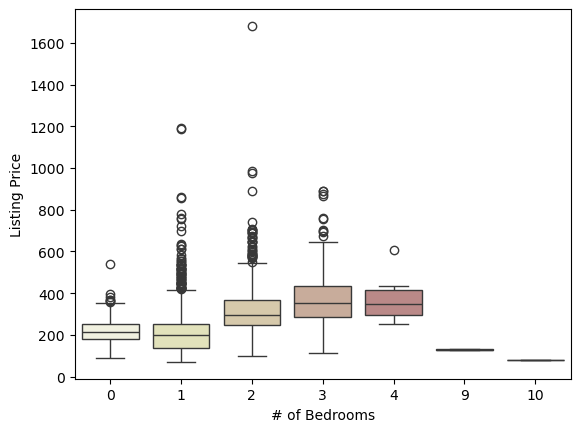

In [46]:
# Plotting a box plot to visualize the spread and outliers of 'Listing_Price' for each 'Bedroom' category
sns.boxplot(data=airbnb_lisbon, x="bedrooms", y="listing_price", palette="pink_r")
plt.ylabel("Listing Price")
plt.xlabel("# of Bedrooms")
plt.show()

<h3 style="color: #FF6B81;">Continuous vs listing price </h3>

<h4 style="color: #FF6B81;">Looking for correlations </h4>

In [47]:
#Checking pearson correlations with listing price
pearson_correlations= df_num.corrwith(airbnb_lisbon["listing_price"]).sort_values(ascending=False) 
pearson_correlations

listing_price                 1.000000
rest_index_norm               0.248554
attr_index_norm               0.195742
guest_satisfaction_overall    0.138249
metro_dist                   -0.000781
lng                          -0.019488
dist                         -0.141221
lat                          -0.164056
dtype: float64

In [48]:
#Checking spearman correlations with listing price
spearman_correlations= df_num.corrwith(airbnb_lisbon["listing_price"], method="spearman").sort_values(ascending=False) 
spearman_correlations

listing_price                 1.000000
attr_index_norm               0.289164
rest_index_norm               0.281919
guest_satisfaction_overall    0.185445
metro_dist                    0.084099
lng                          -0.070768
lat                          -0.261661
dist                         -0.277968
dtype: float64

From the previous results we may infer that the correlations between the listing prices and numerical variables, such as attraction index, restaurant index, distance to city center, distance to metro station and guest satisfaction, are not as strong as anticipated. However, even if weak, we may state that these correlation are more suitable to be described as monotonic than linear. Let's vizualise this correlations within scatter plots.

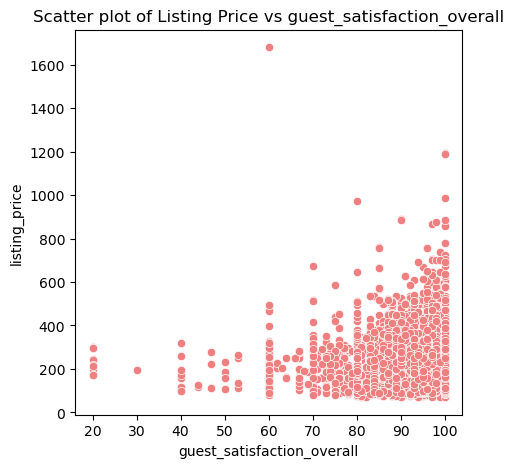

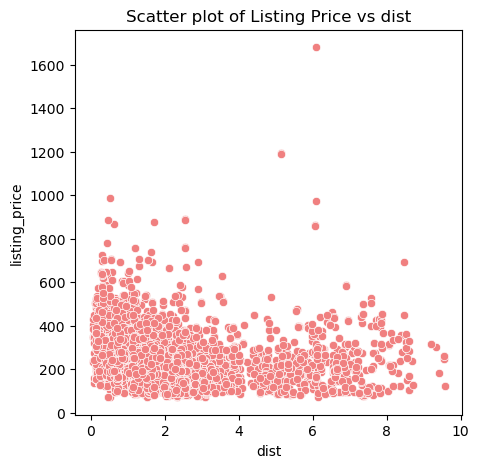

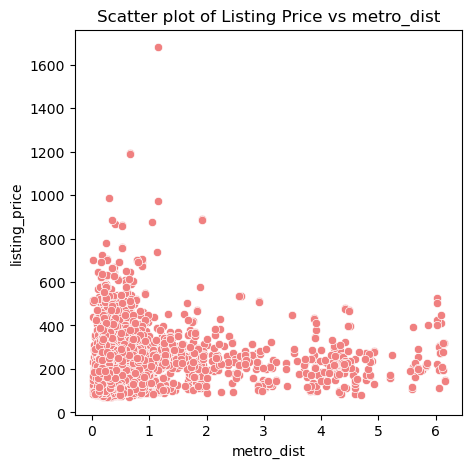

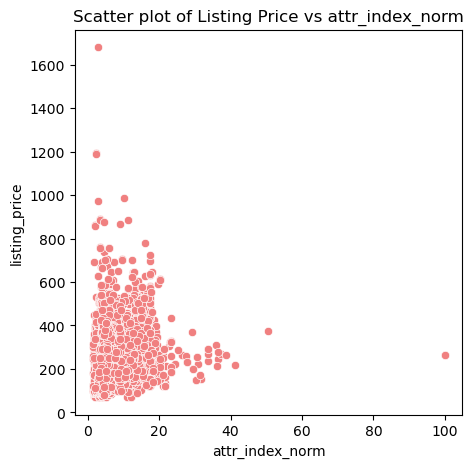

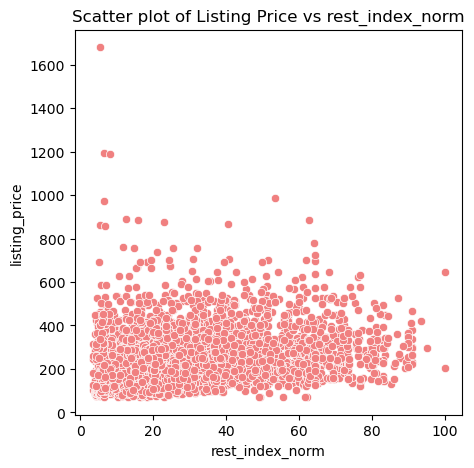

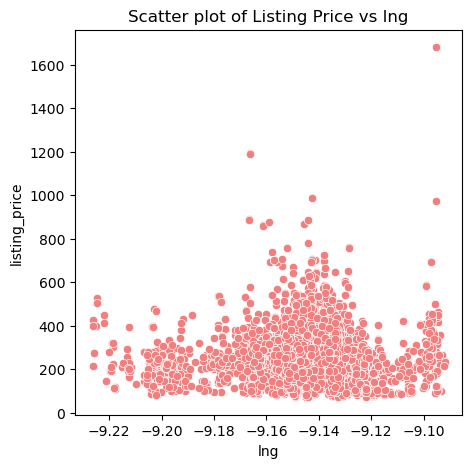

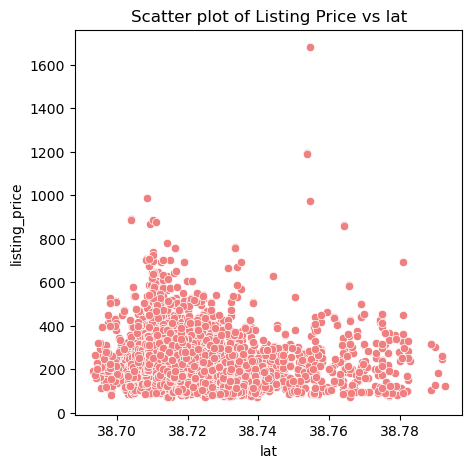

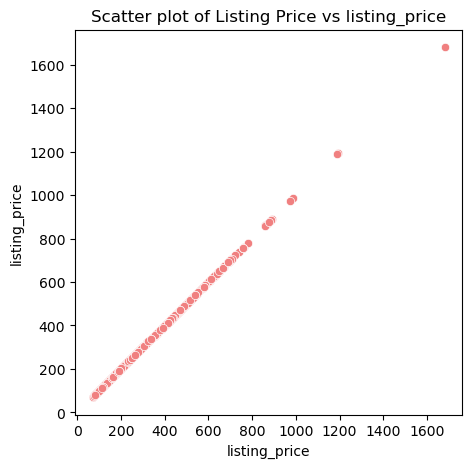

In [49]:
# Plotting scatter plots for each numerical column against 'listing_price' to visualize their relationships
for col in df_num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Listing Price vs ' + col)
    sns.scatterplot(data=airbnb_lisbon, x=col, y='listing_price', color="#F08080")
    plt.show()

In [50]:
correlation_matrix = df_num.corr(method="spearman")

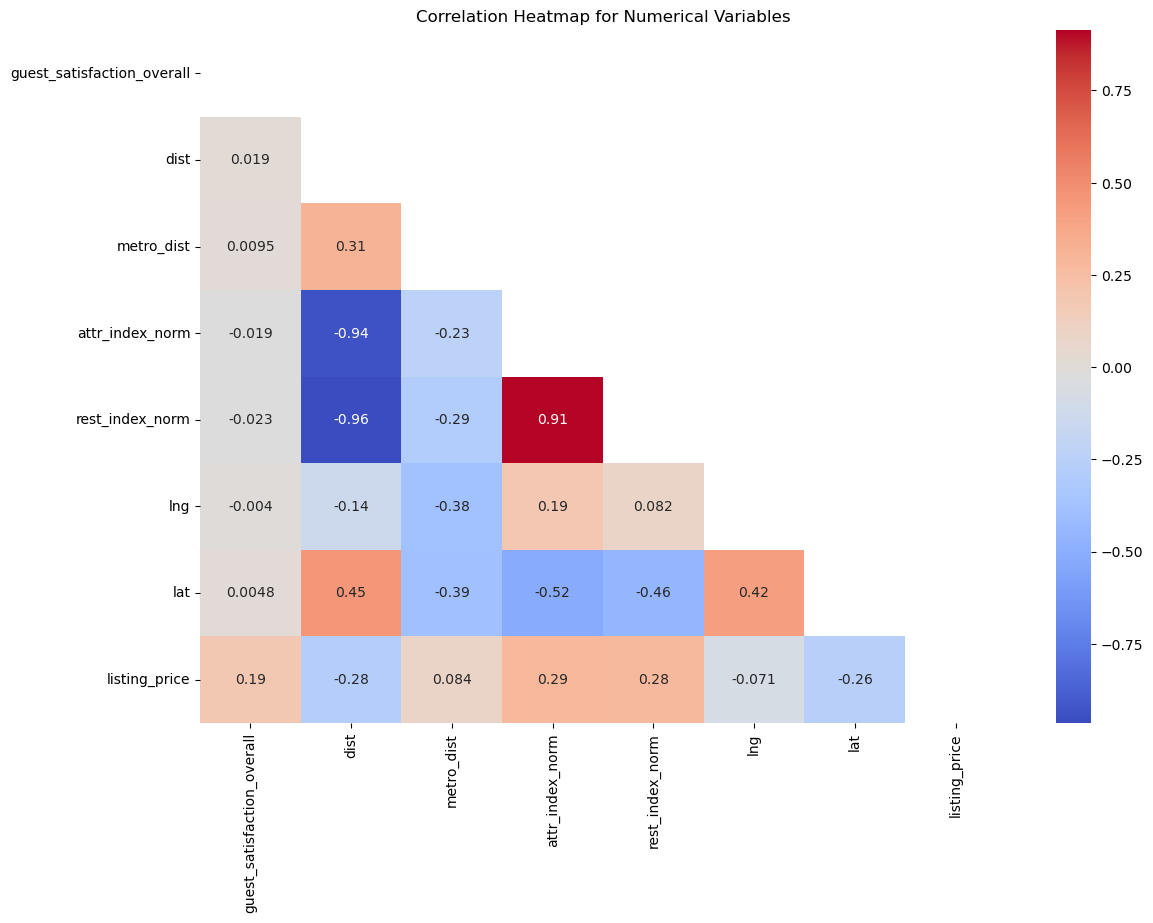

In [51]:
plt.figure(figsize=(13, 9))

# Drawing the heatmap for th
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask)

plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

From the correlation matrix we can spot significant negative correlation between both `attr_index_norm` and `rest_index_norm`with `dist`. Also, a strong positive correlation between `attr_index_norm` and `rest_index_norm`.

<h4 style="color: #FF6B81;">Checking Distributions in continuous variables </h4>

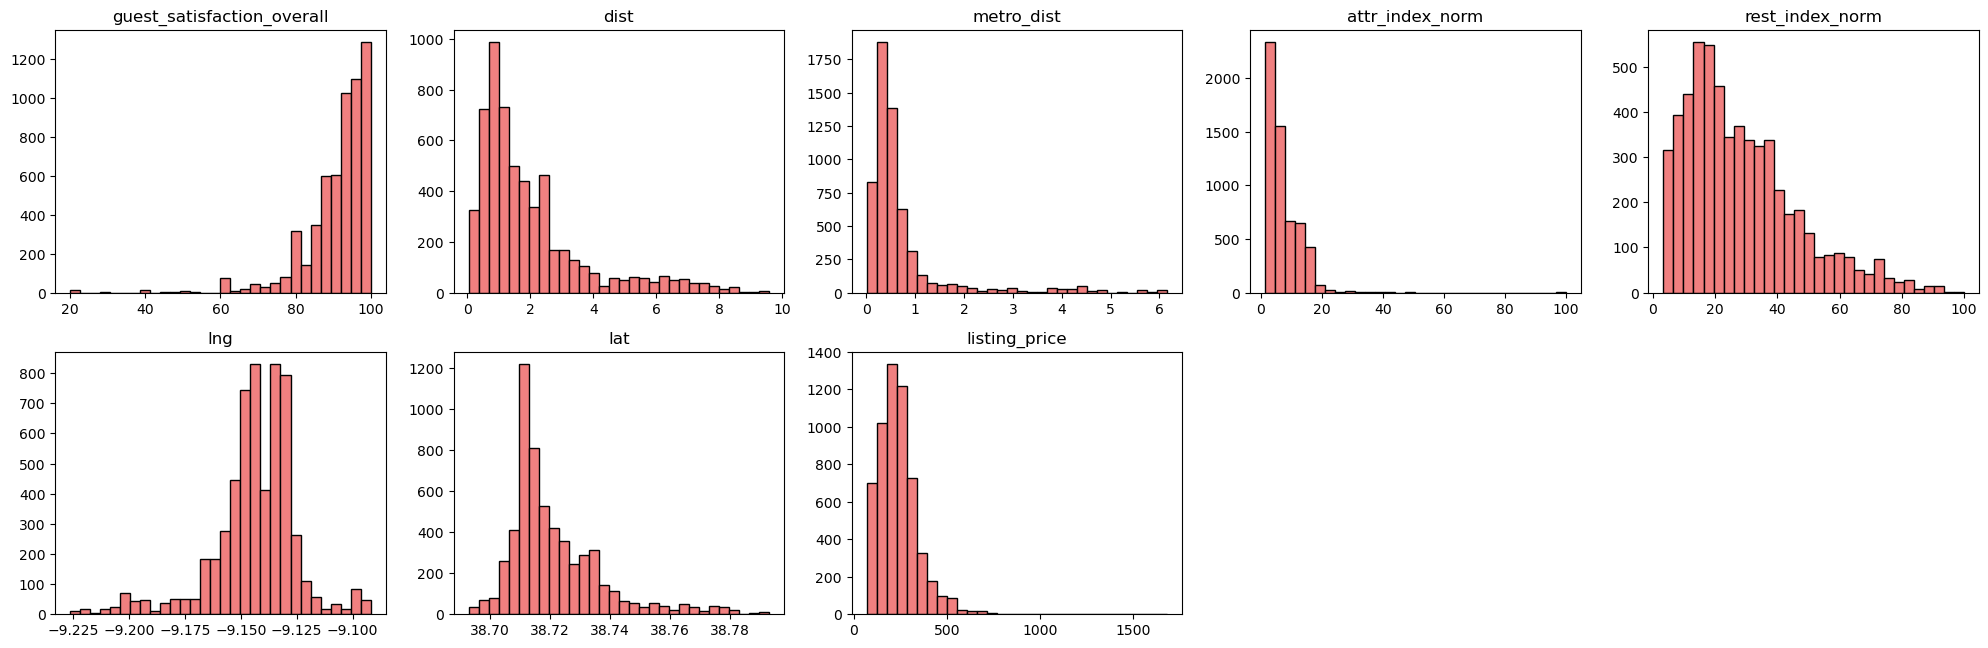

In [52]:
color = '#F08080'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_num.columns[i])

plt.tight_layout()
plt.show()

<h4 style="color: #FF6B81;">Checking Outliers in Continuous variables </h4>

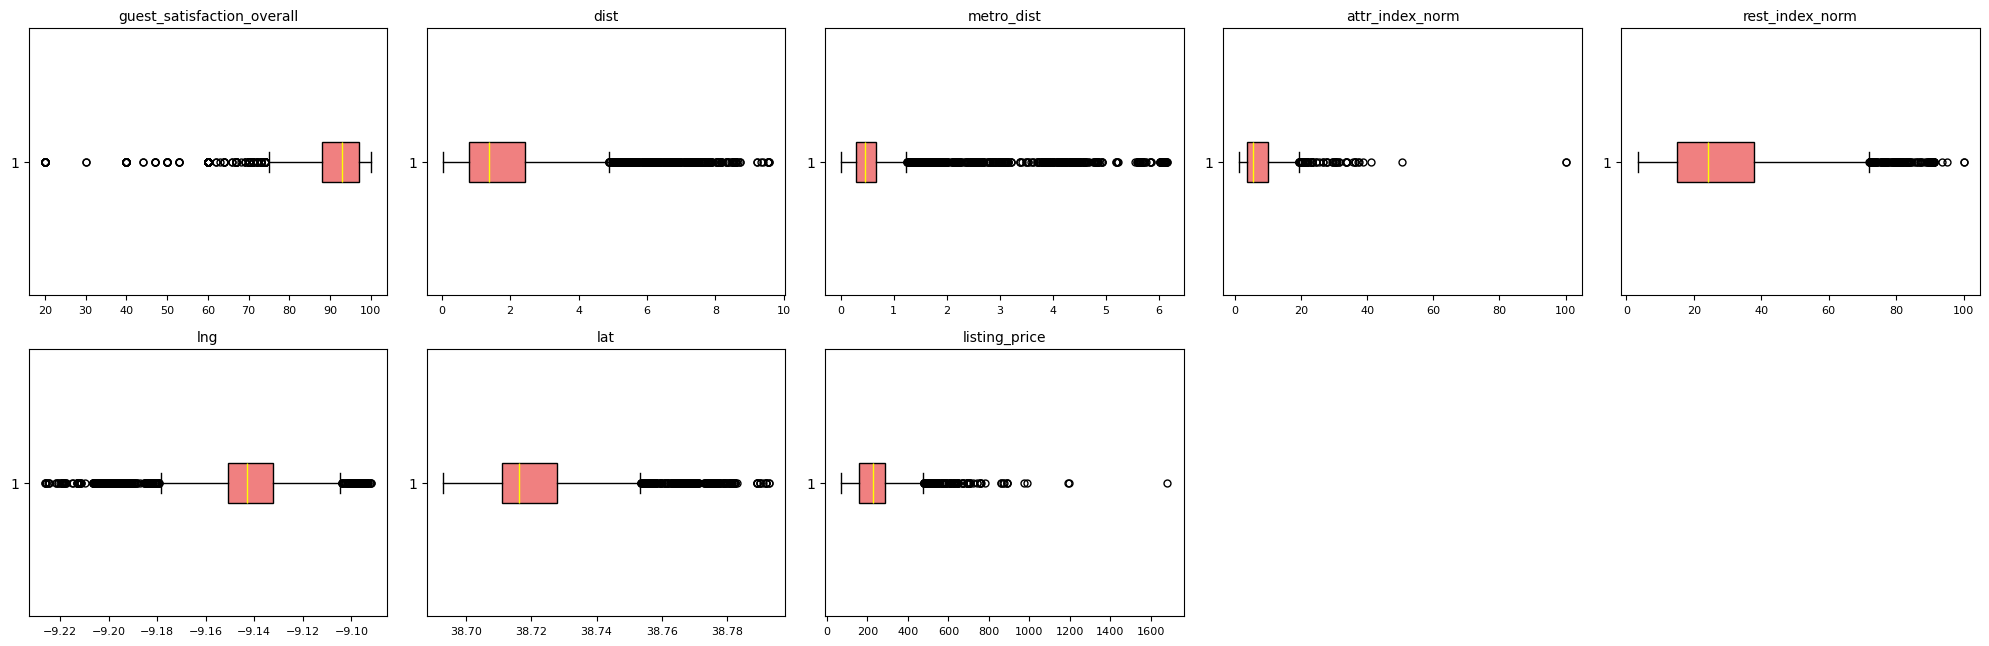

In [53]:
color = '#F08080'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_num.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h4 style="color: #FF6B81;">Checking Outliers in Discrete variables </h4>

In [54]:
df_cat.room_type.value_counts()

room_type
Entire home/apt    3878
Private room       1811
Shared room          74
Name: count, dtype: int64

In [55]:
df_cat_discrete =df_cat.copy()

In [56]:
#In order to check outliers and distributions let's replace room type object with integers
room_type_mapping = {"Entire home/apt": 1, "Private room": 2, "Shared room": 3}

In [57]:
df_cat_discrete.room_type=df_cat_discrete.room_type.map(room_type_mapping)

In [58]:
df_cat_discrete

,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,bedrooms,weekend
0,2,2,1,1,0,10,1,0
1,2,2,1,1,0,10,1,0
2,2,4,1,1,0,10,2,0
3,1,4,0,0,1,9,1,0
4,1,6,0,1,0,9,2,0
...,...,...,...,...,...,...,...,...
5758,1,3,0,0,1,6,1,1
5759,1,4,1,0,1,10,1,1
5760,1,4,1,0,1,10,2,1
5761,1,2,1,0,0,10,1,1


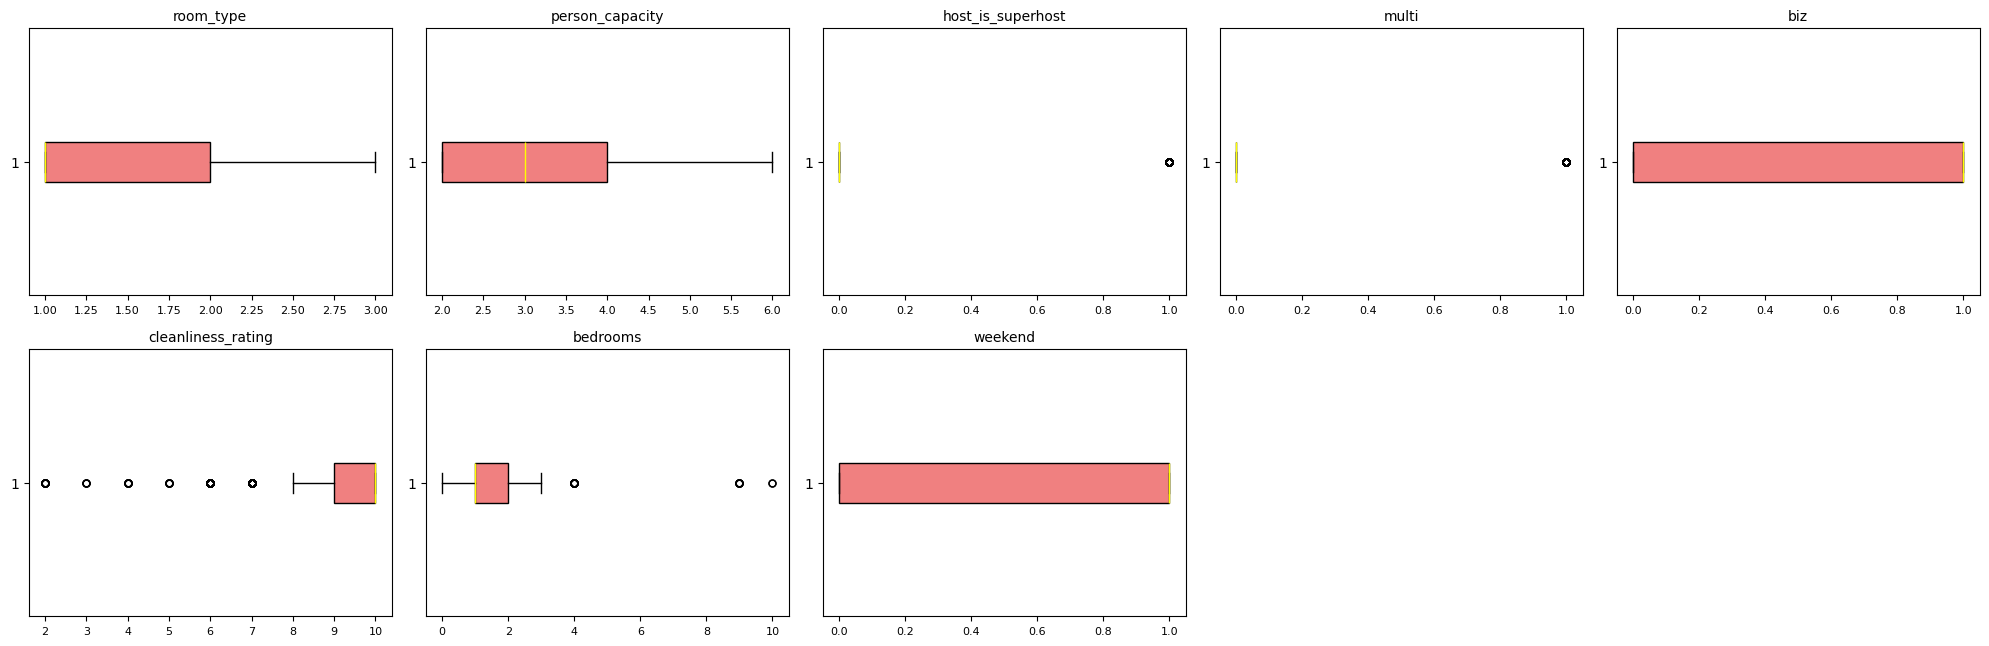

In [59]:
color = '#F08080'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_cat_discrete.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_cat_discrete.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_cat_discrete.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h4 style="color: #FF6B81;">Checking Distributions in continuous variables </h4>

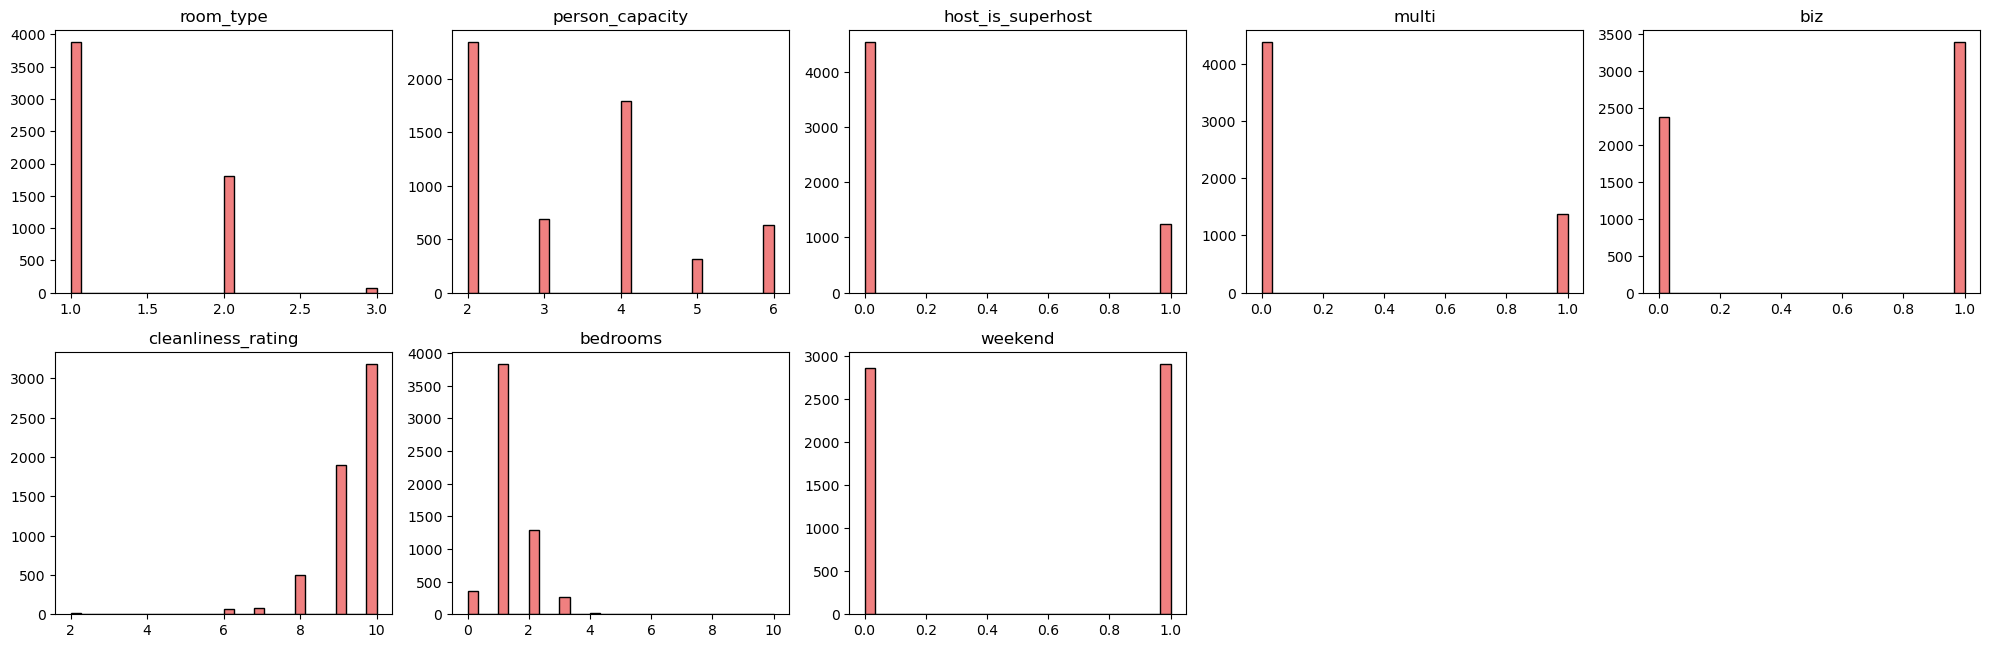

In [60]:
color = '#F08080'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_cat_discrete.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_cat_discrete.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_cat_discrete.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #FF6B81;">Hypothesis testing</h3>

#### Hypotheses **#1**
- **Null Hypothesis (H₀)**: The mean listing price for weekends bookings is equal to the  mean listing price for weekdays bookings.

- **Alternative Hypothesis (H₁)**: The mean listing price for weekends bookings is not equal to the  mean listing price for weekdays bookings.

In [61]:
# Listing prices for the two defined samples 
weekdays_price = airbnb_lisbon[airbnb_lisbon["weekend"] == 0]["listing_price"]
weekends_price = airbnb_lisbon[airbnb_lisbon["weekend"] == 1]["listing_price"]

# Perform two-sample t-test for independent samples
t_stat, p_value = st.ttest_ind(weekdays_price, weekends_price, equal_var=False)
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: The mean listing price for weekends and weekdays bookings are not significantly different.")
else:
    print("Reject the Null Hypothesis: There is sufficient evidence to conclude that the mean listing price is different for weekends and weekdays bookings.")

Test Statistic (t): -1.29
P-Value: 0.1977

Fail to Reject the Null Hypothesis: The mean listing price for weekends and weekdays bookings are not significantly different.


#### Hypotheses **#2**
- **Null Hypothesis (H₀)**: The mean listing price for superhost accommodation is equal to the mean listing price for non-superhost accommodation.

- **Alternative Hypothesis (H₁)**: The mean listing price for superhost accommodation is not equal to the mean listing price for non-superhost accommodation.

In [62]:
# Listing prices for the two defined samples 
superhost_price = airbnb_lisbon[airbnb_lisbon["host_is_superhost"] == 1]["listing_price"]
not_superhost_price = airbnb_lisbon[airbnb_lisbon["host_is_superhost"] == 0]["listing_price"]

# Perform two-sample t-test for independent samples
t_stat, p_value = st.ttest_ind(superhost_price, not_superhost_price, equal_var=False)
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: The mean listing price for superhosts and not superhosts bookings is not significantly different.")
else:
    print("Reject the Null Hypothesis: There is sufficient evidence to conclude that the mean listing price is different for superhosts and not superhosts bookings.")

Test Statistic (t): 5.63
P-Value: 0.0000

Reject the Null Hypothesis: There is sufficient evidence to conclude that the mean listing price is different for superhosts and not superhosts bookings.


#### Hypotheses **#3**
- **Null Hypothesis (H₀)**: The mean listing price for shared room bookings is equal to the mean listing price for private room bookings.

- **Alternative Hypothesis (H₁)**: The mean listing price for shared room bookings is equal to the mean listing price for private room bookings.

In [63]:
# Listing prices for the two defined samples 
shared_room_price = airbnb_lisbon[airbnb_lisbon["room_type"] == "Shared room"]["listing_price"]
private_room_price = airbnb_lisbon[airbnb_lisbon["room_type"] == "Private room"]["listing_price"]

# Perform two-sample t-test for independent samples
t_stat, p_value = st.ttest_ind(shared_room_price, private_room_price, equal_var=False)
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: The mean listing price for shared rooms and private rooms bookings is not significantly different.")
else:
    print("Reject the Null Hypothesis: There is sufficient evidence to conclude that the mean listing price is different for shared rooms and private rooms bookings.")

Test Statistic (t): -12.54
P-Value: 0.0000

Reject the Null Hypothesis: There is sufficient evidence to conclude that the mean listing price is different for shared rooms and private rooms bookings.


#### Hypotheses **#4**
- **Null Hypothesis (H₀)**: The mean listing price for accommodation located up to 500 metres away from the city center is equal to the mean listing price for the remain accommodation.

- **Alternative Hypothesis (H₁)**: The mean listing price for accommodation located up to 500 metres away from the city center is not equal to the mean listing price for the remain accommodation.


In [64]:
# Extract fares for male and female passengers
city_center_price = airbnb_lisbon[airbnb_lisbon["dist"] < 0.5 ]["listing_price"]
not_city_center_price = airbnb_lisbon[airbnb_lisbon["dist"] >= 0.5]["listing_price"]


# Perform two-sample t-test for independent samples
t_stat, p_value = st.ttest_ind(city_center_price, not_city_center_price, equal_var=False) # equal_var True for Welch's test (more robus, relies less on variance)
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: The mean listing price for accommodation located up to 500 metres away from the city center and for the remain locations is not significantly different.")
else:
    print("Reject the Null Hypothesis: There is sufficient evidence to conclude that the mean listing price is different for accommodation located up to 500 metres away from the city center and for the remain locations.")

Test Statistic (t): 12.28
P-Value: 0.0000

Reject the Null Hypothesis: There is sufficient evidence to conclude that the mean listing price is different for accommodation located up to 500 metres away from the city center and for the remain locations.


<h2 style="color: #FF6B81;">Machine Learning </h2>

In [65]:
airbnb_lisbon_ML = airbnb_lisbon.copy()

In [66]:
airbnb_lisbon_ML.dtypes

room_type                      object
person_capacity                 int32
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating              int32
guest_satisfaction_overall      int32
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
lng                           float64
lat                           float64
weekend                         int64
listing_price                 float64
dtype: object

<h3 style="color: #FF6B81;">One-hot encoding room type </h3>

In [67]:
airbnb_lisbon_ML.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [68]:
room_type_list = ['Private room', 'Entire home/apt', 'Shared room']

for col in room_type_list:
    airbnb_lisbon_ML[f"{col}"] = 0

In [69]:
for col in room_type_list:
    airbnb_lisbon_ML[f"{col}"] = airbnb_lisbon_ML["room_type"].str.contains(f"{col}").astype(int)

In [70]:
airbnb_lisbon_ML.drop(columns={"room_type"}, inplace=True)

In [71]:
airbnb_lisbon_ML.rename(columns={"Private room":"private_room", "Entire home/apt": "entire_home_apt", "Shared room": "shared_room"}, inplace=True)

In [72]:
target = airbnb_lisbon_ML.pop("listing_price")

In [73]:
airbnb_lisbon_ML["listing_price"] = target

In [74]:
airbnb_lisbon_ML.head()

,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,weekend,private_room,entire_home_apt,shared_room,listing_price
0,2,1,1,0,10,98,1,4.33,0.30,2.45,7.91,-9.14034,38.75137,0,1,0,0,138.13
1,2,1,1,0,10,97,1,4.47,0.29,2.40,7.78,-9.14092,38.75260,0,1,0,0,124.06
2,4,1,1,0,10,87,2,4.48,0.17,2.39,7.96,-9.14245,38.75264,0,1,0,0,194.18
3,4,0,0,1,9,89,1,0.85,0.59,13.53,36.07,-9.13000,38.71100,0,0,1,0,191.60
4,6,0,1,0,9,93,2,0.67,0.53,17.73,34.69,-9.13200,38.71300,0,0,1,0,327.86


<h3 style="color: #FF6B81;">X-y split </h3>

In [75]:
X = airbnb_lisbon_ML.drop("listing_price", axis=1)
y = airbnb_lisbon_ML["listing_price"]

<h3 style="color: #FF6B81;">Train-Test split </h3>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3 style="color: #FF6B81;">Model #1: Linear Regression </h3>

First, let's run a linear regression model with no data preparation (dealing with multicollineariry, outliers, normalization/standardization, etc.).

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [79]:
#Validation
linear_predictions = linear_model.predict(X_test)

In [80]:
#Metrics
r2_linear_model = r2_score(y_test, linear_predictions)
RMSE_linear_model  = mean_squared_error(y_test, linear_predictions, squared=False)
MSE_linear_model  = mean_squared_error(y_test, linear_predictions)
MAE_linear_model  = mean_absolute_error(y_test, linear_predictions)

In [81]:
#Printing the results
print("R2 = ", round(r2_linear_model, 4))
print("RMSE = ", round(RMSE_linear_model, 2))
print("MSE =  ", round(MSE_linear_model, 2)) 
print("MAE = ", round(MAE_linear_model, 2))

R2 =  0.5025
RMSE =  77.71
MSE =   6038.87
MAE =  50.39


<h3 style="color: #FF6B81;">Model #2: Decision Tree regression </h3>

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
#Validation
tree_predictions = tree_model.predict(X_test)

In [85]:
#Metrics
r2_tree_model = r2_score(y_test, tree_predictions)
RMSE_tree_model  = mean_squared_error(y_test, tree_predictions, squared=False)
MSE_tree_model  = mean_squared_error(y_test, tree_predictions)
MAE_tree_model  = mean_absolute_error(y_test, tree_predictions)

In [86]:
#Printing the results
print("R2 = ", round(r2_tree_model, 4))
print("RMSE = ", round(RMSE_tree_model, 2))
print("MSE =  ", round(MSE_tree_model, 2)) 
print("MAE = ", round(MAE_tree_model, 2))

R2 =  0.5026
RMSE =  77.7
MSE =   6037.37
MAE =  40.59


<h3 style="color: #FF6B81;">Model #3: XGBoost regression </h3>

In [87]:
import xgboost as xgb

In [88]:
xgbr_model = xgb.XGBRFRegressor()
xgbr_model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [89]:
#Validation
xgbr_predictions = xgbr_model.predict(X_test)

In [90]:
#Metrics
r2_xgbr_model = r2_score(y_test, xgbr_predictions)
RMSE_xgbr_model  = mean_squared_error(y_test, xgbr_predictions, squared=False)
MSE_xgbr_model  = mean_squared_error(y_test, xgbr_predictions)
MAE_xgbr_model  = mean_absolute_error(y_test, xgbr_predictions)

In [91]:
#Printing the results
print("R2 = ", round(r2_tree_model, 4))
print("RMSE = ", round(RMSE_xgbr_model, 2))
print("MSE =  ", round(MSE_xgbr_model, 2)) 
print("MAE = ", round(MAE_xgbr_model, 2))

R2 =  0.5026
RMSE =  70.18
MSE =   4925.78
MAE =  45.74


<h3 style="color: #FF6B81;">Model #4: Random Forest </h3>

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
#Validation
forest_predictions = forest_model.predict(X_test)

In [95]:
#Metrics
r2_forest_model = r2_score(y_test, forest_predictions)
RMSE_forest_model  = mean_squared_error(y_test, forest_predictions, squared=False)
MSE_forest_model  = mean_squared_error(y_test, forest_predictions)
MAE_forest_model  = mean_absolute_error(y_test, forest_predictions)

In [96]:
#Printing the results
print("R2 = ", round(r2_forest_model, 4))
print("RMSE = ", round(RMSE_forest_model, 2))
print("MSE =  ", round(MSE_forest_model, 2)) 
print("MAE = ", round(MAE_forest_model, 2))

R2 =  0.6973
RMSE =  60.61
MSE =   3673.55
MAE =  36.52


<h3 style="color: #FF6B81;">Checking feature importance for Random forest </h3>

In [97]:
feature_names = list(X_train.columns)
forest_importances = forest_model.feature_importances_
indices = np.argsort(forest_importances)[::-1] # sorts indices of importances in descending order

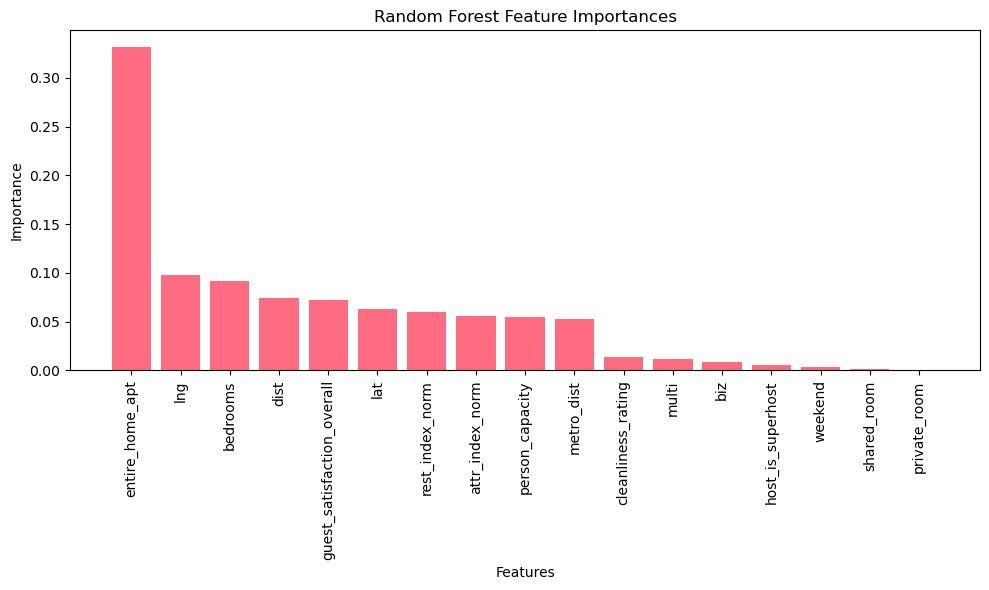

In [98]:
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), forest_importances[indices], align="center", color="#FF6B81")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

<h3 style="color: #FF6B81;">Fine Tuning using GridSearchCV </h3>

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameters = {'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 600, 800]}

In [101]:
model = GridSearchCV(forest_model, parameters)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 600, 800]})

In [102]:
#Validation
gridsearchCV_predictions = model.predict(X_test)

In [103]:
#Metrics
r2_gridsearchCV = r2_score(y_test, gridsearchCV_predictions)
RMSE_gridsearchCV  = mean_squared_error(y_test, gridsearchCV_predictions, squared=False)
MSE_gridsearchCV = mean_squared_error(y_test, gridsearchCV_predictions)
MAE_gridsearchCV  = mean_absolute_error(y_test, gridsearchCV_predictions)

In [104]:
#Printing the results
print("R2 = ", round(r2_gridsearchCV, 4))
print("RMSE = ", round(RMSE_gridsearchCV, 2))
print("MSE =  ", round(MSE_gridsearchCV, 2)) 
print("MAE = ", round(MAE_gridsearchCV, 2))

R2 =  0.7098
RMSE =  59.34
MSE =   3521.64
MAE =  36.16


<h3 style="color: #FF6B81;">Metrics Comparision </h3>

In [106]:
#final comparision
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'XGBoost', 'Random Forest', 'Random Forest_tuned'],
    'R²': [r2_linear_model, r2_tree_model, r2_xgbr_model, r2_forest_model, r2_gridsearchCV],
    'RMSE': [RMSE_linear_model, RMSE_tree_model, RMSE_xgbr_model, RMSE_forest_model, RMSE_gridsearchCV],
    'MSE': [MSE_linear_model, MSE_tree_model, MSE_xgbr_model, MSE_forest_model, MSE_gridsearchCV],
    'MAE': [MAE_linear_model, MAE_tree_model, MAE_xgbr_model, MAE_forest_model, MAE_gridsearchCV]}

In [107]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model", inplace=True)
df_metrics.round(2)

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.50,77.71,6038.87,50.39
Decision Tree,0.50,77.70,6037.37,40.59
XGBoost,0.59,70.18,4925.78,45.74
Random Forest,0.70,60.61,3673.55,36.52
Random Forest_tuned,0.71,59.34,3521.64,36.16
